# Jupyter Notebook for Cybersecurity - Part 2/5

**The is part 2/5 of the project. While some of the instructions and code will repeat it is recommended that you review previous parts to get a complete understanding of the process.**

Jupter Notebook is an open interactive tool for large-scale data exploration, transformation, analysis, and visualization. It is built on Jupyter (formerly IPython) and is similar to Google Cloud's Datalab.

The data set used in this Jupyter Notebook is the **CobaltStrike_Hunting Google Doc** The sheet named **Cobalt Strike -Te-k research 2020** was downloaded and saved locally as a CSV file. 

Link to the Google Doc Sheet is: https://docs.google.com/spreadsheets/d/1bYvBh6NkNYGstfQWnT5n7cSxdhjSn1mduX8cziWSGrw/edit#gid=516128248

# Getting Started

## Install Libraries

First step: in your computer's command prompt enter the following two commands to install the pandas and matplotlib libraries: 

Note: "Pip3" is a version of the pip installer for python3

## Import Libraries

Second Step: import the above installed libraries in your Jupyter Notebook

In [1]:
import pandas as pd
# data analysis and manipulation tool

import numpy as np
# mathematical functions

import matplotlib.pyplot as plt
# creating static, animated, and interactive visualizations

%matplotlib inline
# renders static images 

# %matplotlib notebook
# renders dynamic interactive images 

import re
# regular expression library

## Load  Data

The third and last step in Getting Started is to load your raw data. This is much easier if you have your raw data saved in the same directory where you are running Jupyter Notebook from.

In [2]:
df = pd.read_csv('cb_servers_small.csv')

## Default Data Display

By default, the pandas' library displays just a few rows of the full output. You can override this to display all of the output by executing the following code:

### Confirm a Successful Data Load

In [3]:
df.head()

,Host,SSL,Port,GET uri,POST uri,User Agent,Watermark
0,54.66.253.144,True,443,"54.66.253.144,/s/ref=nb_sb_noss_1/167-3294888-...",/N4215/adj/amzn.us.sr.aps,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,562884990
1,103.243.183.250,True,443,"103.243.183.250,/search.js",/hr,Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,305419896
2,185.82.126.47,True,443,"185.82.126.47,/pixel",/submit.php,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,305419896
3,94.156.174.121,True,443,"94.156.174.121,/watch",/ptracking,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,76803050
4,194.36.191.118,True,443,"194.36.191.118,/visit.js",/submit.php,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,305419896


# Regular Expression (RE)

## Filter Data Using RE

In [8]:
# Filter on the "GET uri" column and contains "login" OR "access" values

df.loc[df['GET uri'].str.contains('login|access', flags=re.I, regex=True)]

,Host,SSL,Port,GET uri,POST uri,User Agent,Watermark


In [9]:
# Filter on the "GET uri" column and DOES NOT contain "login" OR "access" values

df.loc[~df['GET uri'].str.contains('login')]

,Host,SSL,Port,GET uri,POST uri,User Agent,Watermark
0,54.66.253.144,True,443,"54.66.253.144,/s/ref=nb_sb_noss_1/167-3294888-...",/N4215/adj/amzn.us.sr.aps,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,562884990
1,103.243.183.250,True,443,"103.243.183.250,/search.js",/hr,Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,305419896
2,185.82.126.47,True,443,"185.82.126.47,/pixel",/submit.php,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,305419896
3,94.156.174.121,True,443,"94.156.174.121,/watch",/ptracking,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,76803050


In [11]:
# Filter on the "User Agent" column that DOES NOT begin with "Mozilla" 

df.loc[~df['User Agent'].str.contains('Mozilla[a-z]*')]

,Host,SSL,Port,GET uri,POST uri,User Agent,Watermark


In [13]:
# Filter on the "GET uri" columns that begins a valid IP address 
# A regular expression is used to look for a valid IP address pattern that is followed by any character

df.loc[df['GET uri'].str.contains('^\d{1,3}.\d{1,3}.\d{1,3}.\d{1,3}.', flags=re.I, regex=True)]

,Host,SSL,Port,GET uri,POST uri,User Agent,Watermark
0,54.66.253.144,True,443,"54.66.253.144,/s/ref=nb_sb_noss_1/167-3294888-...",/N4215/adj/amzn.us.sr.aps,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,562884990
1,103.243.183.250,True,443,"103.243.183.250,/search.js",/hr,Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,305419896
2,185.82.126.47,True,443,"185.82.126.47,/pixel",/submit.php,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,305419896
3,94.156.174.121,True,443,"94.156.174.121,/watch",/ptracking,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.3...,76803050


## Basic Statistical Values 

In [14]:
# generate a unique count of the values in the "User Agent" column
df['User Agent'].value_counts()

Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko)                                                  1
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko                                                 1
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; MASB)                                         1
Mozilla/5.0 (Linux; Android 6.0; HTC One X10 Build/MRA58K; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0    1
Name: User Agent, dtype: int64

## Basic Visualization

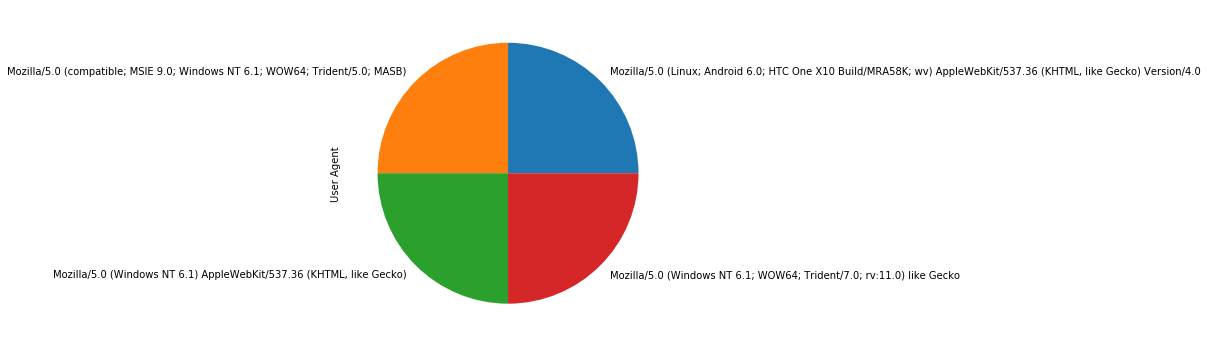

In [3]:
# plot a pie chart of the top 5 "User Agent" values  using 'nlargest(5)'
df['User Agent'].value_counts().nlargest(5).plot(kind='pie',figsize=[6,6])

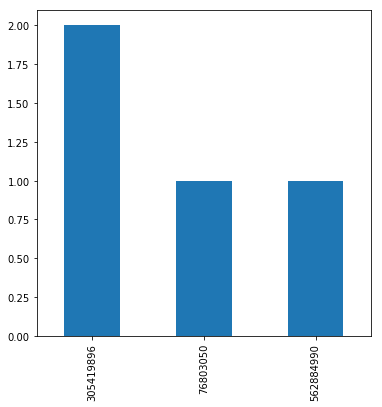

In [4]:
# plot a bar chart of the top 5 "Watermark" values using 'nlargest(5)'
ax = df['Watermark'].value_counts().nlargest(5).plot(kind='bar',figsize=[6,6])

## Basic Grouping

In [20]:
# group data by "User Agent" , "POST uri" and "Host" columns
df.groupby(['User Agent','POST uri', 'Host']).first()

,,,SSL,Port,GET uri,Watermark
User Agent,POST uri,Host,,,,
"Mozilla/5.0 (Linux; Android 6.0; HTC One X10 Build/MRA58K; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0",/hr,103.243.183.250,True,443,"103.243.183.250,/search.js",305419896
"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko)",/ptracking,94.156.174.121,True,443,"94.156.174.121,/watch",76803050
Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko,/N4215/adj/amzn.us.sr.aps,54.66.253.144,True,443,"54.66.253.144,/s/ref=nb_sb_noss_1/167-3294888-...",562884990
Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; MASB),/submit.php,185.82.126.47,True,443,"185.82.126.47,/pixel",305419896


In [22]:
# change the abve grouping order slightly to see how the data is displayed 
# group data by "User Agent" , "POST uri"  columns
df.groupby(['POST uri' , 'User Agent']).first()


,,Host,SSL,Port,GET uri,Watermark
POST uri,User Agent,,,,,
/N4215/adj/amzn.us.sr.aps,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko,54.66.253.144,True,443,"54.66.253.144,/s/ref=nb_sb_noss_1/167-3294888-...",562884990
/hr,"Mozilla/5.0 (Linux; Android 6.0; HTC One X10 Build/MRA58K; wv) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0",103.243.183.250,True,443,"103.243.183.250,/search.js",305419896
/ptracking,"Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko)",94.156.174.121,True,443,"94.156.174.121,/watch",76803050
/submit.php,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0; MASB),185.82.126.47,True,443,"185.82.126.47,/pixel",305419896


## Data Iteration

In [23]:
# Iterate over the "Host" column
df['Host'].head()

0      54.66.253.144
1    103.243.183.250
2      185.82.126.47
3     94.156.174.121
Name: Host, dtype: object

# Create New Column

In [ ]:
# Create Column

In [ ]:
# data_in = [{'Host'}]
# df_new = pd.DataFrame(data_in)

In [ ]:
#create a new dataframe
df_2 = df

# #create a new empty column
# df_2 = df.reindex(columns = Mydataframe.columns.tolist()  + ['Hostname'])
# df_2.head()

In [ ]:
df_2.head()

In [ ]:
ip_addrs = df_2['Host']
ip_addrs.head()

In [ ]:
df_2['Host'].head()

In [ ]:
### Need to figure out how to iterate over df['Host'] Column
##https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas/55557758#55557758

In [ ]:
# for i, row in df_2.iterrows():
#     print(row['Host'])

for i, row in df_2.iterrows():
    print(i, row)


## after sucessfuly iterating over df 'Host', use, ipap.location code below to get IP info

In [ ]:
for ip in ip_addrs:
    try:
        ip_res_data = (ipapi.location(ip))
        time.sleep(5)
    except Exception as e:
        ip_res_data.append(e)

In [ ]:
ip_res_data

#why this only saved one value

## need to dump the collected JSON data and then just access: "asn", "country", "org" values

In [ ]:
# ip_res_data_serial = json.dumps(ip_res_data)
# type(ip_res_data_serial)

In [ ]:
#IP resolution using socket loop
##https://gist.github.com/Wildcarde/1b718dc919601c3b978b226da642247a

# ip_addrs = df['Host']
# for ip in ip_addrs:
#     try:
#         print(socket.gethostbyaddr(ip))
#     except: 
#         print("No resolution for %s" % (ip))
    


In [ ]:
# #IP ressolution using ipapi library
# ipapi.location('54.66.253.144')

# #interested fields: asn, country_name, org

In [ ]:
# json.dumps(ip_res_data['country_name'],['ip'])

In [ ]:
# for data in ip_res_data['country_name']:
#     print(country_name)